In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd


In [4]:
#importing 14datasets
df_circuits = pd.read_csv("../data/circuits.csv") #list of circuits and their attributes
df_constructors = pd.read_csv("../data/constructors.csv") #list of constructors and their attributes
df_constructor_standings = pd.read_csv("../data/constructor_standings.csv") #points and positions for a constructor given race id
df_constructor_results = pd.read_csv("../data/constructor_results.csv") #
df_seasons = pd.read_csv("../data/seasons.csv")
df_status = pd.read_csv("../data/status.csv")
df_drivers = pd.read_csv("../data/drivers.csv")
df_driver_standings = pd.read_csv("../data/driver_standings.csv")
df_qualifying = pd.read_csv("../data/qualifying.csv")
df_races = pd.read_csv("../data/races.csv")
df_lap_times = pd.read_csv("../data/lap_times.csv")
df_pit_stops = pd.read_csv("../data/pit_stops.csv")

df_results = pd.read_csv("../data/results.csv")
df_sprint_results = pd.read_csv("../data/sprint_results.csv")

__Number of Circuits = 79 <br>
Number of Drivers = 854<br>
Number of Constructors = 211 <br>
Number of Races = 1079  <br>
Number of Qualis = <br>
Number of Sprints = <br>__


# Circuits

In [5]:
df_circuits.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


In [6]:
df_circuits.shape

(79, 9)

In [7]:
df_circuits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   circuitId   79 non-null     int64  
 1   circuitRef  79 non-null     object 
 2   name        79 non-null     object 
 3   location    79 non-null     object 
 4   country     79 non-null     object 
 5   lat         79 non-null     float64
 6   lng         79 non-null     float64
 7   alt         79 non-null     object 
 8   url         79 non-null     object 
dtypes: float64(2), int64(1), object(6)
memory usage: 5.7+ KB


In [8]:
for i in ['circuitId','circuitRef','name','location','country']:
    print(i,df_circuits[i].nunique())

circuitId 79
circuitRef 79
name 79
location 76
country 35


In [9]:
df_circuits.location.value_counts().head(4)

Barcelona     2
California    2
Spielberg     2
Kent          1
Name: location, dtype: int64

In [10]:
df_circuits.rename(columns={'location':'city'},errors='raise',inplace=True)

In [11]:
df_circuits.alt.replace('\\N',np.nan,inplace=True)
df_circuits = df_circuits.fillna(-1000)
df_circuits.alt = df_circuits.alt.astype('int64')
#altitude is in metres

In [12]:
df_circuits.alt.replace(-1000,np.nan,inplace=True)

<AxesSubplot:xlabel='alt', ylabel='count'>

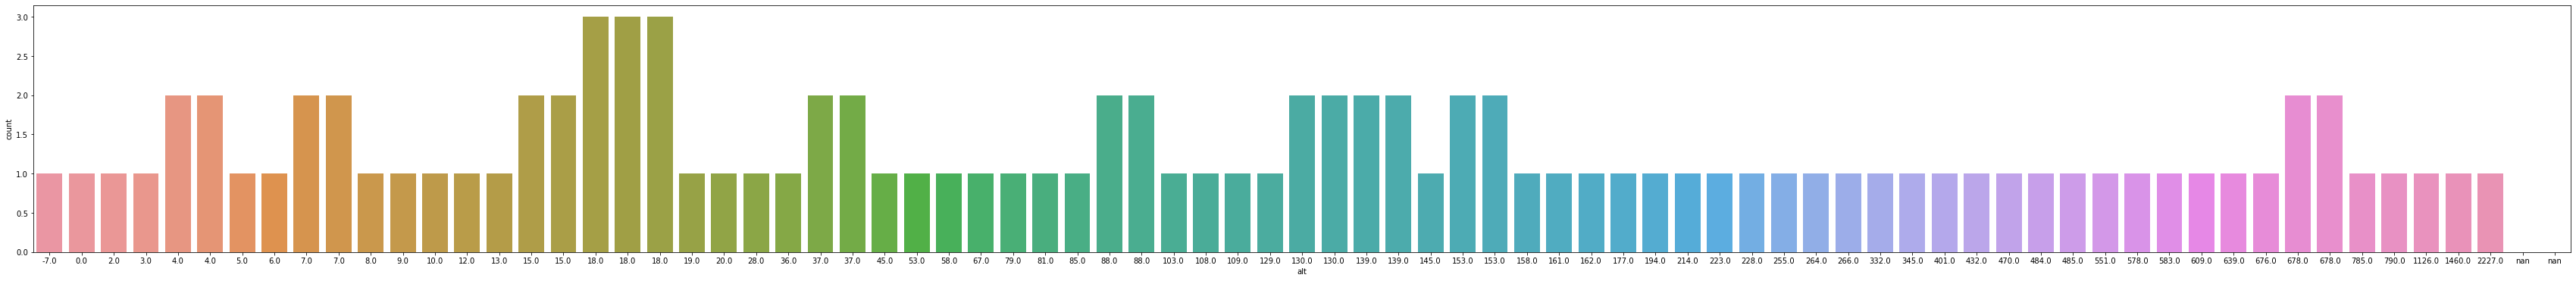

In [13]:
plt.figure(figsize=(60,6))
sns.countplot(x = df_circuits.alt,order = df_circuits.alt.sort_values())

In [14]:
df_circuits.loc[df_circuits['circuitRef']=='miami','alt'] = 2
df_circuits.loc[df_circuits['circuitRef']=='losail','alt'] = 7

#Values don't make sense. Google gives you -28 for Baku, and 2.1m for the Circuit

<AxesSubplot:xlabel='lng', ylabel='lat'>

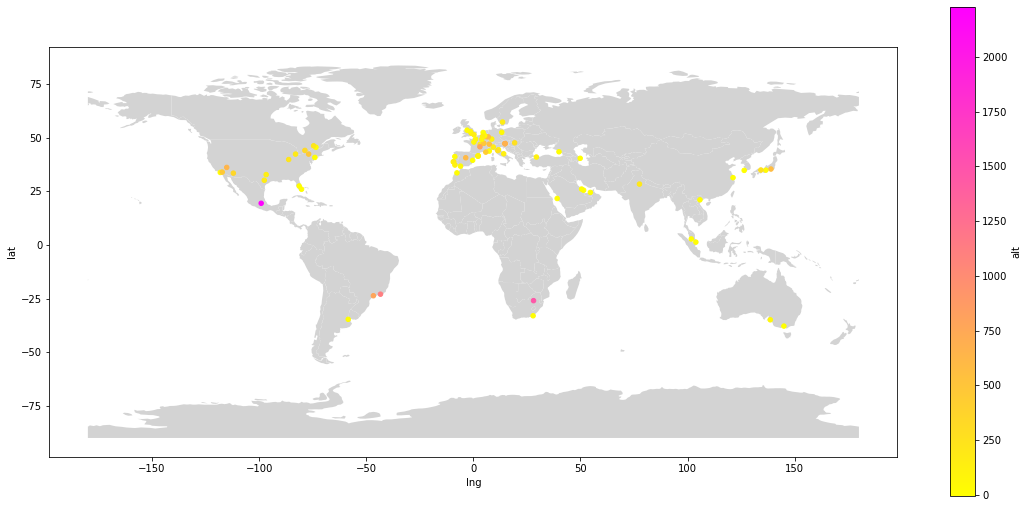

In [15]:
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
fig, ax = plt.subplots(figsize=(19,9))

countries.plot(color="lightgrey",ax=ax)
df_circuits.plot(x="lng", y="lat", kind="scatter", ax=ax, c="alt", colormap="spring_r")

In [16]:
circuits = df_circuits.drop(['alt','city','url'],axis=1) 
circuits.head(2)

,circuitId,circuitRef,name,country,lat,lng
0,1,albert_park,Albert Park Grand Prix Circuit,Australia,-37.84970,144.968
1,2,sepang,Sepang International Circuit,Malaysia,2.76083,101.738


# Constructors

In [17]:
df_constructors.head()

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [18]:
df_constructors[df_constructors.constructorRef=='mercedes']

,constructorId,constructorRef,name,nationality,url
129,131,mercedes,Mercedes,German,http://en.wikipedia.org/wiki/Mercedes-Benz_in_...


In [19]:
df_constructors[df_constructors.constructorId==172]

,constructorId,constructorRef,name,nationality,url
169,172,lotus-climax,Lotus-Climax,British,http://en.wikipedia.org/wiki/Team_Lotus


In [20]:
df_constructors.shape

(211, 5)

In [21]:
for i in df_constructors.columns:
    print(i,df_constructors[i].nunique())

constructorId 211
constructorRef 211
name 211
nationality 24
url 174


<AxesSubplot:>

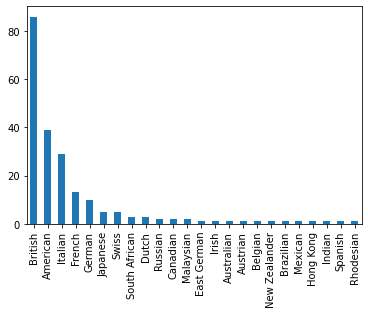

In [22]:
df_constructors.nationality.value_counts().plot.bar()
#From Indian, only 1 team per nation
#Over 80 british teams???

In [23]:
constructors = df_constructors.drop(['url'],axis=1)
constructors.head(2)

,constructorId,constructorRef,name,nationality
0,1,mclaren,McLaren,British
1,2,bmw_sauber,BMW Sauber,German


# Constructor Standings

In [24]:
df_constructor_standings.head(3)

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0


In [25]:
df_constructor_standings.groupby(['raceId','constructorId']).size()

raceId  constructorId
1       2                1
        3                1
        4                1
        5                1
        6                1
                        ..
1076    117              1
        131              1
        210              1
        213              1
        214              1
Length: 12741, dtype: int64

In [26]:
df_constructor_standings.shape

(12741, 7)

In [27]:
for i in df_constructor_standings.columns:
    print(i,df_constructor_standings[i].nunique())

#Positions for 159 constructors in 996 races


constructorStandingsId 12741
raceId 996
constructorId 159
points 517
position 22
positionText 23
wins 20


In [28]:
df_constructor_standings.position.value_counts()
# 21 (3) and 22 (1)

3     996
1     996
2     996
4     995
6     995
5     995
7     991
8     979
9     965
10    934
11    723
12    497
13    389
14    333
15    300
16    227
17    179
18    124
19     94
20     29
21      3
22      1
Name: position, dtype: int64

In [29]:
df_constructor_standings.positionText.value_counts()


3     996
1     996
2     996
5     995
6     995
4     995
7     991
8     979
9     965
10    934
11    706
12    497
13    389
14    333
15    300
16    227
17    179
18    124
19     94
20     29
E      17
21      3
22      1
Name: positionText, dtype: int64

In [30]:
df_constructor_standings[df_constructor_standings.raceId==728]

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
9086,19940,728,89,0.0,13,13,0
9087,19939,728,180,0.0,15,15,0
9088,19938,728,51,0.0,16,16,0
9089,19937,728,86,0.0,18,18,0
9090,19935,728,179,0.0,21,21,0
9091,19933,728,32,0.0,19,19,0
9092,19932,728,98,0.0,10,10,0
9093,19931,728,167,0.0,14,14,0
9094,19930,728,97,0.0,17,17,0
9095,19928,728,170,25.0,5,5,0


In [31]:
df_constructor_standings.raceId.value_counts()
#for 728 race, there were 22 teams

728    22
559    21
575    21
558    20
368    20
       ..
124     6
175     6
18      6
158     6
765     3
Name: raceId, Length: 996, dtype: int64

In [32]:
cId = set(df_constructors.constructorId)
cId_std = set(df_constructor_standings.constructorId)
cId_list = cId.difference(cId_std)
print(len(cId_list))
constructors.loc[constructors.constructorId.isin(cId_list),:]
#let's remove these teams later

52


,constructorId,constructorRef,name,nationality
37,38,moda,Andrea Moda,Italian
86,88,eagle,Eagle,American
100,102,ferguson,Ferguson,British
105,107,watson,Watson,American
106,108,epperly,Epperly,American
107,109,phillips,Phillips,American
108,110,lesovsky,Lesovsky,American
109,111,trevis,Trevis,American
110,112,meskowski,Meskowski,American
112,114,kuzma,Kuzma,American


In [33]:
df_constructor_standings.points.value_counts()
#constructor points for season

0.0      3887
1.0       625
3.0       452
2.0       441
6.0       385
         ... 
232.5       1
224.0       1
558.0       1
533.0       1
620.0       1
Name: points, Length: 517, dtype: int64

<AxesSubplot:>

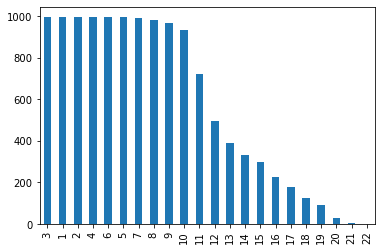

In [34]:
df_constructor_standings.position.value_counts().plot.bar()

In [35]:
df_constructor_standings.wins.value_counts()
#Season win count

0     9947
1     1083
2      514
3      367
4      227
5      166
6      137
7       87
8       65
9       42
10      37
11      21
12      14
13      11
14       9
15       8
16       3
19       1
18       1
17       1
Name: wins, dtype: int64

# Seasons

In [36]:
df_seasons.head(3)
df_seasons.shape
#Unnecessary Column

(73, 2)

# Status

In [37]:
df_status.head(3)
#explanatory dataset

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident


# Drivers

In [38]:
df_drivers.head(3)

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg


In [39]:
df_drivers.shape

(854, 9)

In [40]:
for i in df_drivers.columns:
    print(i,df_drivers[i].nunique())

driverId 854
driverRef 854
number 44
code 92
forename 474
surname 795
dob 836
nationality 42
url 854


In [41]:
df_drivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 854 entries, 0 to 853
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driverId     854 non-null    int64 
 1   driverRef    854 non-null    object
 2   number       854 non-null    object
 3   code         854 non-null    object
 4   forename     854 non-null    object
 5   surname      854 non-null    object
 6   dob          854 non-null    object
 7   nationality  854 non-null    object
 8   url          854 non-null    object
dtypes: int64(1), object(8)
memory usage: 60.2+ KB


In [42]:
df_drivers.number.replace('\\N',np.nan,inplace=True)
df_drivers.number.value_counts()
df_drivers.number.nunique()

43

In [43]:
df_drivers.code.replace('\\N',np.nan,inplace=True)
df_drivers.code.value_counts()
df_drivers.code.nunique()

91

In [44]:
df_drivers.surname.value_counts()
#To find legacies

Taylor        5
Fittipaldi    4
Wilson        4
Stewart       3
Brabham       3
             ..
Blundell      1
O'Connor      1
Larrousse     1
Gibson        1
Nasr          1
Name: surname, Length: 795, dtype: int64

<AxesSubplot:>

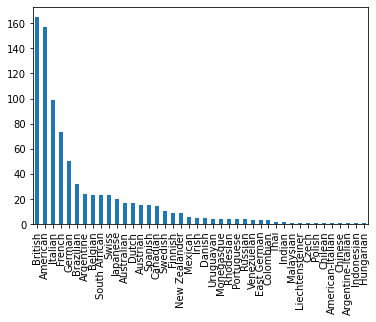

In [45]:
df_drivers.nationality.value_counts().plot.bar()

In [46]:
df_drivers.dob = pd.to_datetime(df_drivers.dob)

In [47]:
df_drivers.dob.dt.year.value_counts().sort_index(ascending=False)

2000    1
1999    4
1998    2
1997    2
1996    4
       ..
1902    2
1900    2
1899    3
1898    3
1896    1
Name: dob, Length: 103, dtype: int64

<AxesSubplot:xlabel='dob', ylabel='count'>

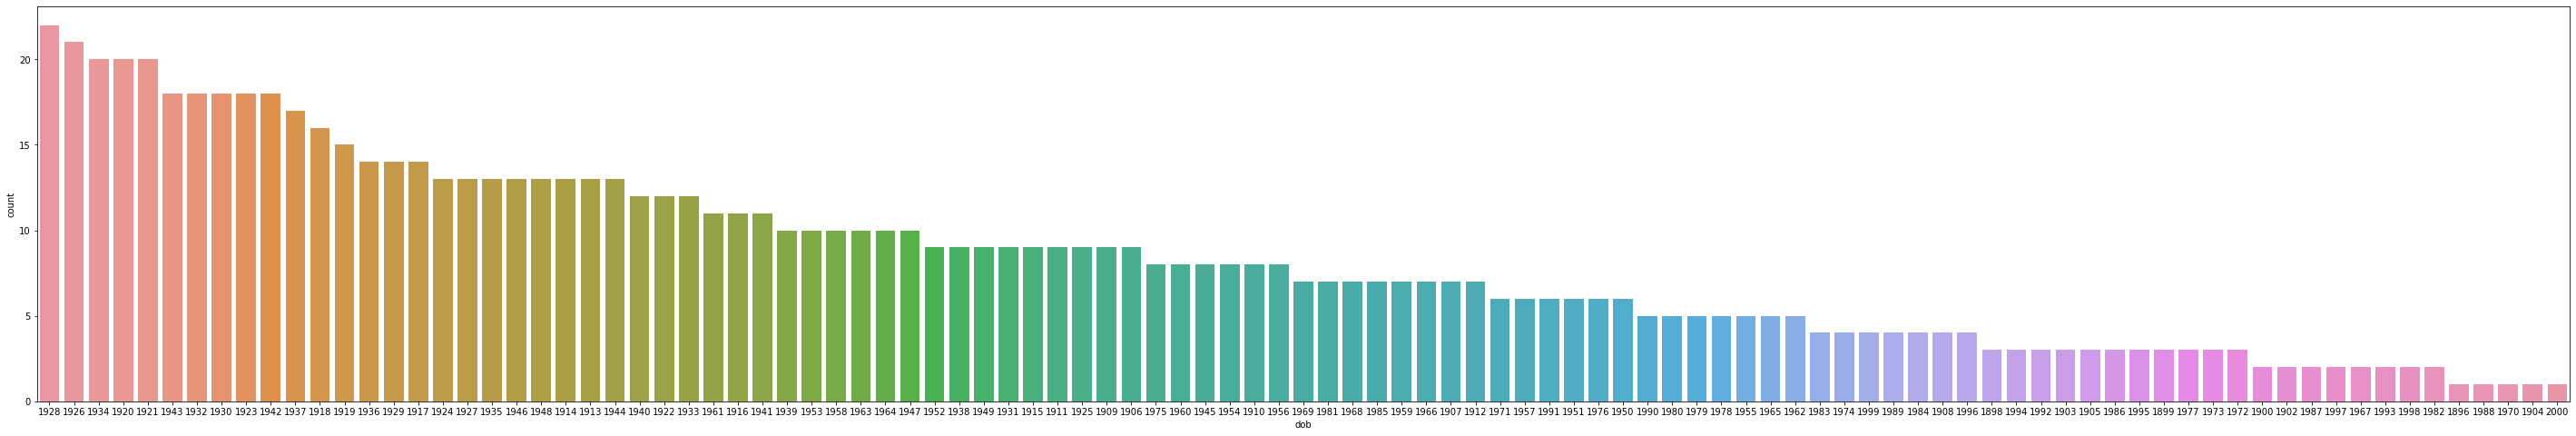

In [48]:
plt.figure(figsize=(50,8))
sns.countplot(x=df_drivers.dob.dt.year,order=df_drivers.dob.dt.year.value_counts().index)

<AxesSubplot:xlabel='dob', ylabel='count'>

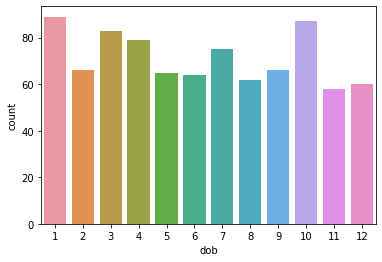

In [49]:
sns.countplot(x=df_drivers.dob.dt.month,order=df_drivers.dob.dt.month.value_counts().sort_index().index)

<AxesSubplot:xlabel='dob', ylabel='count'>

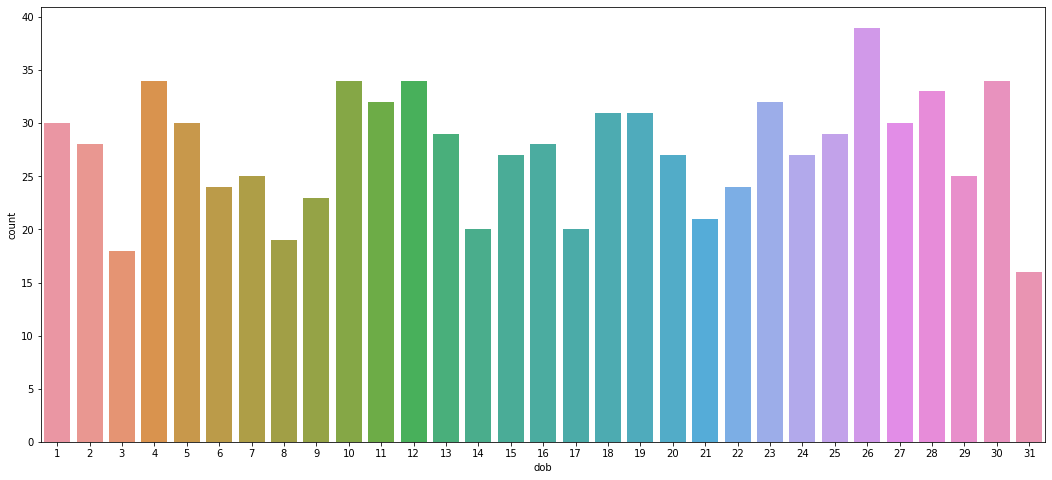

In [50]:
plt.figure(figsize=(18,8))
sns.countplot(x=df_drivers.dob.dt.day,order=df_drivers.dob.dt.day.value_counts().sort_index().index)

In [51]:
drivers = df_drivers.drop(['url'],axis=1)
drivers.head(2)

,driverId,driverRef,number,code,forename,surname,dob,nationality
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British
1,2,heidfeld,NaN,HEI,Nick,Heidfeld,1977-05-10,German


# Driver Standings

In [52]:
df_driver_standings.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0


In [53]:
for i in df_driver_standings.columns:
    print(i,df_driver_standings[i].nunique())

driverStandingsId 33476
raceId 1060
driverId 847
points 402
position 108
positionText 109
wins 14


In [54]:
df_driver_standings.shape

(33476, 7)

In [55]:
race_id_cs = set(df_constructor_standings.raceId)
race_id_ds = set(df_driver_standings.raceId)
len(race_id_ds.difference(race_id_cs))
#64 races that have no constructor info??

64

In [56]:
driver_id_dr = set(df_drivers.driverId)
driver_id_ds = set(df_driver_standings.driverId)
d_id_list = driver_id_dr.difference(driver_id_ds)
print(len(d_id_list))
drivers.loc[drivers.driverId.isin(d_id_list),:]
#7 drivers are missing

7


,driverId,driverRef,number,code,forename,surname,dob,nationality
27,28,markus_winkelhock,NaN,WIN,Markus,Winkelhock,1980-06-13,German
71,72,sarrazin,NaN,NaN,Stéphane,Sarrazin,1975-11-02,French
79,80,sospiri,NaN,NaN,Vincenzo,Sospiri,1966-10-07,Italian
123,124,apicella,NaN,NaN,Marco,Apicella,1965-10-07,Italian
129,130,chiesa,NaN,NaN,Andrea,Chiesa,1964-05-06,Swiss
131,132,amati,NaN,NaN,Giovanna,Amati,1959-07-20,Italian
134,135,mccarthy,NaN,NaN,Perry,McCarthy,1961-03-03,British


In [57]:
df_driver_standings.points.value_counts()
#Driver points for the entire season

0.0      16344
1.0       1602
2.0       1446
3.0       1263
4.0       1210
         ...  
408.0        1
343.5        1
258.0        1
130.5        1
318.5        1
Name: points, Length: 402, dtype: int64

In [58]:
df_driver_standings[df_driver_standings.raceId==18]

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0
5,6,18,6,3.0,6,6,0
6,7,18,7,2.0,7,7,0
7,8,18,8,1.0,8,8,0


In [59]:
df_driver_standings.position.value_counts().sort_index()

1      1060
2      1060
3      1060
4      1060
5      1060
       ... 
104       2
105       2
106       1
107       1
108       1
Name: position, Length: 108, dtype: int64

In [60]:
df_driver_standings.wins.value_counts()
#Number of wins in the season for drivers

0     29518
1      2028
2       825
3       403
4       242
5       168
6       123
7        60
8        35
9        35
10       19
11       12
12        5
13        3
Name: wins, dtype: int64

In [61]:
driver_standings = df_driver_standings.drop(['positionText'],axis=1)
driver_standings.head(2)

,driverStandingsId,raceId,driverId,points,position,wins
0,1,18,1,10.0,1,1
1,2,18,2,8.0,2,0


# Constructor Results

In [62]:
df_constructor_results.head(3)

,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,\N
1,2,18,2,8.0,\N
2,3,18,3,9.0,\N


In [63]:
for i in df_constructor_results.columns:
    print(i,df_constructor_results[i].nunique())

constructorResultsId 11980
raceId 997
constructorId 175
points 53
status 2


In [64]:
df_constructor_results.shape

(11980, 5)

In [65]:
#all race Ids are present maybe because certain constructors results were nada they are not present in standings?

In [66]:
cId_res = set(df_constructor_results.constructorId)
cId_list = cId.difference(cId_res)
print(len(cId_list))
constructors.loc[constructors.constructorId.isin(cId_list),:]
#let's remove these teams later
print(len(cId_res.difference(cId_std)))

36
16


In [67]:
df_constructor_results.points.value_counts().sort_index()
#Constructor points for the race

0.0     6762
0.5        3
1.0      640
1.5        5
2.0      610
2.5        2
3.0      539
4.0      565
4.5        3
5.0      145
5.5        1
6.0      554
7.0       91
7.5        1
8.0      203
9.0      376
10.0     308
11.0      44
12.0     119
12.5       1
13.0      63
14.0      96
15.0     118
16.0      97
17.0       5
18.0     108
19.0      15
20.0      20
21.0       9
22.0      45
23.0      21
24.0       4
25.0      61
26.0      26
27.0      41
28.0      18
29.0       6
30.0      25
31.0       9
32.0       2
33.0      40
34.0       7
35.0      16
36.0       1
37.0      28
38.0       3
40.0      36
41.0       8
43.0      69
44.0       8
45.0       1
50.0       1
66.0       1
Name: points, dtype: int64

In [68]:
df_constructor_results[df_constructor_results.raceId==18]

,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,\N
1,2,18,2,8.0,\N
2,3,18,3,9.0,\N
3,4,18,4,5.0,\N
4,5,18,5,2.0,\N
5,6,18,6,1.0,\N
6,7,18,7,0.0,\N
7,8,18,8,0.0,\N
8,9,18,9,0.0,\N
9,10,18,10,0.0,\N


In [69]:
df_constructor_results.replace('\\N',np.nan,inplace=True)
df_constructor_results.status.value_counts()
#D is for disqualified

D    17
Name: status, dtype: int64

In [70]:
constructor_results = df_constructor_results.copy()
constructor_results.head(2)

,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,NaN
1,2,18,2,8.0,NaN


# Qualifying

In [71]:
df_qualifying.head(3)

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079


In [72]:
df_qualifying.shape

(9195, 9)

In [73]:
for i in df_qualifying.columns:
    print(i,df_qualifying[i].nunique())

qualifyId 9195
raceId 429
driverId 165
constructorId 46
number 53
position 28
q1 8110
q2 4618
q3 2899


In [74]:
#out of 996 races on;y 429 had qualis
#only 165 drivers out of 854 total participated in qualis
#only 46 constructors participated in quali out of 211

In [75]:
df_qualifying.number.value_counts().sort_index().head(3)
#10 numbers that are not in drivers???

0     15
1    272
2    305
Name: number, dtype: int64

In [76]:
drivers.loc[drivers.driverId==71,:]

,driverId,driverRef,number,code,forename,surname,dob,nationality
70,71,damon_hill,NaN,NaN,Damon,Hill,1960-09-17,British


In [77]:
df_qualifying.loc[df_qualifying.number==0,:]

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
2595,2597,257,71,3,0,4,1:17.554,\N,\N
2620,2622,258,71,3,0,3,1:10.771,\N,\N
2647,2649,259,71,3,0,4,1:22.168,\N,\N
2673,2675,261,71,3,0,2,1:22.559,\N,\N
2701,2703,262,71,3,0,4,1:27.094,\N,\N
2724,2726,263,71,3,0,1,1:16.282,\N,\N
2750,2752,264,71,3,0,1,1:24.960,\N,\N
2778,2780,265,71,3,0,3,1:44.026,\N,\N
2803,2805,266,71,3,0,2,1:18.824,\N,\N
2830,2832,267,71,3,0,3,2:21.681,\N,\N


In [78]:
df_qualifying.number.replace(0,np.nan,inplace=True)
#same number of numbers

In [79]:
df_qualifying.position.value_counts().sort_index()

1     429
2     429
3     429
4     429
5     429
6     429
7     429
8     429
9     429
10    429
11    429
12    429
13    429
14    429
15    429
16    429
17    429
18    429
19    422
20    415
21    215
22    207
23     90
24     82
25     20
26     20
27      1
28      1
Name: position, dtype: int64

In [80]:
for i in ['q1','q2','q3']:
    print(i,df_qualifying[i].value_counts().head(3))


q1 \N          137
1:20.888      4
1:20.382      4
Name: q1, dtype: int64
q2 \N          4175
1:31.227       3
1:15.322       3
Name: q2, dtype: int64
q3 \N          5932
1:38.513       3
1:35.766       3
Name: q3, dtype: int64


In [81]:
df_qualifying['q1'].replace('\\N',np.nan,inplace=True)
df_qualifying['q2'].replace('\\N',np.nan,inplace=True)
df_qualifying['q3'].replace('\\N',np.nan,inplace=True)

In [82]:
df_qualifying.q2 = pd.to_datetime(df_qualifying.q2,format='%M:%S.%f')
df_qualifying.q1 = pd.to_datetime(df_qualifying.q1,format='%M:%S.%f')
df_qualifying.q3 = pd.to_datetime(df_qualifying.q3,format='%M:%S.%f')

In [83]:
qualifying = df_qualifying.copy()

# Races

In [84]:
print(df_races.shape)
df_races.head(3)

(1079, 8)


,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,29/03/09,6:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,05/04/09,9:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,19/04/09,7:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...


In [85]:
for i in df_races.columns:
    print(i,df_races[i].nunique())

raceId 1079
year 73
round 22
circuitId 77
name 53
date 1079
time 34
url 1079


In [86]:
# WE are missing 83 race ids
# we are also missing 2 circuitid

circuits.loc[circuits.circuitId.isin(set(circuits.circuitId).difference(set(df_races.circuitId))) ,:]

,circuitId,circuitRef,name,country,lat,lng
71,72,port_imperial,Port Imperial Street Circuit,USA,40.7769,-74.0111
73,74,hanoi,Hanoi Street Circuit,Vietnam,21.0166,105.7660


<AxesSubplot:>

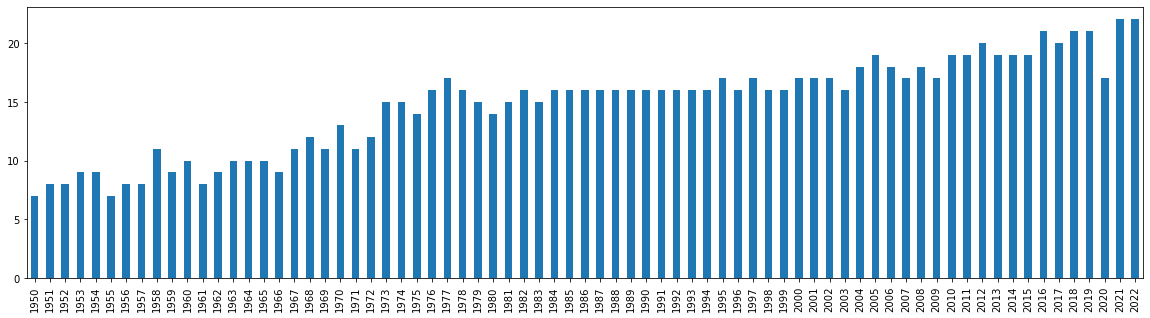

In [87]:
plt.figure(figsize=(20,5))
df_races.year.value_counts().sort_index().plot.bar()

In [88]:
df_races.date = pd.to_datetime(df_races.date)

In [89]:
df_races.time.replace("\\N",np.nan,inplace=True)
df_races.time.value_counts().head(5)

12:00:00    111
13:00:00     33
14:00:00     32
13:10:00     30
6:00:00      19
Name: time, dtype: int64

In [90]:
df_races.time = pd.to_datetime(df_races.time,format='%H:%M:%S')
#race start time

<AxesSubplot:>

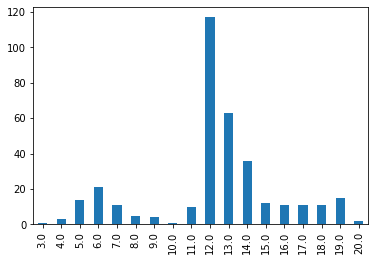

In [91]:
df_races.time.dt.hour.value_counts().sort_index().plot.bar()

In [92]:
races = df_races.drop(['url'],axis=1)
races.head(2)

,raceId,year,round,circuitId,name,date,time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,1900-01-01 06:00:00
1,2,2009,2,2,Malaysian Grand Prix,2009-05-04,1900-01-01 09:00:00


# Lap Times

In [93]:
print(df_lap_times.shape)
df_lap_times.head(3)

(517573, 6)


,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713


In [94]:
for i in df_lap_times.columns:
    print(i,df_lap_times[i].nunique())

raceId 479
driverId 136
lap 87
position 24
time 73490
milliseconds 73490


In [95]:
df_lap_times.lap.value_counts()

1     9775
2     9666
3     9610
4     9577
5     9550
      ... 
83      17
84      17
85      17
86      17
87      17
Name: lap, Length: 87, dtype: int64

In [96]:
df_lap_times.position.value_counts()
#Driver position

1     29298
2     29298
3     29291
4     29275
5     29244
6     29197
7     29041
8     28967
9     28823
10    28588
11    28215
12    27676
13    26908
14    25972
15    24808
16    23028
17    20815
18    17467
19    13614
20     9013
21     4655
22     2701
23     1116
24      563
Name: position, dtype: int64

In [97]:
#Handle time. Different formats

# Pit Stops

In [98]:
print(df_pit_stops.shape)
df_pit_stops.head(3)

(8928, 7)


,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426


In [99]:
for i in df_pit_stops.columns:
    print(i,df_pit_stops[i].nunique())

raceId 220
driverId 69
stop 6
lap 74
time 6821
duration 6363
milliseconds 6363


<AxesSubplot:>

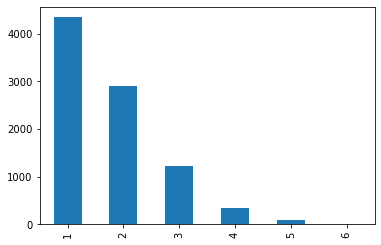

In [100]:
df_pit_stops.stop.value_counts().plot.bar()

In [101]:
df_pit_stops.time = pd.to_datetime(df_pit_stops.time,format='%H:%M:%S')
#Time of pitstop

In [102]:
# df_pit_stops.duration = pd.to_datetime(df_pit_stops.duration,format='%S.%f')
#Same issue as time in lap times

# Results

# Sprint Results

In [103]:
print(df_sprint_results.shape)
df_sprint_results.head(3)

(60, 16)


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,fastestLapTime,statusId
0,1,1061,830,9,33,2,1,1,1,3,17,25:38.426,1538426,14,1:30.013,1
1,2,1061,1,131,44,1,2,2,2,2,17,+1.430,1539856,17,1:29.937,1
2,3,1061,822,131,77,3,3,3,3,1,17,+7.502,1545928,17,1:29.958,1


In [104]:
for i in df_sprint_results.columns:
    print(i,df_sprint_results[i].nunique())

resultId 60
raceId 3
driverId 21
constructorId 10
number 21
grid 20
position 21
positionText 21
positionOrder 20
points 4
laps 5
time 59
milliseconds 59
fastestLap 17
fastestLapTime 60
statusId 3


In [105]:
#Only 3 races have had sprint races
# 10 Constructors and 21 driveres have participated in sprint races


In [106]:
df_sprint_results.points.value_counts()

0    51
1     3
2     3
3     3
Name: points, dtype: int64

In [107]:
df_sprint_results.laps.value_counts()

24    20
17    19
18    19
0      1
16     1
Name: laps, dtype: int64

In [108]:
df_sprint_results.statusId.value_counts()

1     58
3      1
76     1
Name: statusId, dtype: int64

## RESULTS

In [109]:
print(df_results.shape)
for i in df_results.columns:
    print(i,df_results[i].nunique())

(25460, 18)
resultId 25460
raceId 1060
driverId 854
constructorId 210
number 130
grid 35
position 34
positionText 39
positionOrder 39
points 39
laps 172
time 6611
milliseconds 6813
fastestLap 80
rank 26
fastestLapTime 6460
fastestLapSpeed 6610
statusId 135


In [110]:
df_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25460 entries, 0 to 25459
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         25460 non-null  int64  
 1   raceId           25460 non-null  int64  
 2   driverId         25460 non-null  int64  
 3   constructorId    25460 non-null  int64  
 4   number           25460 non-null  object 
 5   grid             25460 non-null  int64  
 6   position         25460 non-null  object 
 7   positionText     25460 non-null  object 
 8   positionOrder    25460 non-null  int64  
 9   points           25460 non-null  float64
 10  laps             25460 non-null  int64  
 11  time             25460 non-null  object 
 12  milliseconds     25460 non-null  object 
 13  fastestLap       25460 non-null  object 
 14  rank             25460 non-null  object 
 15  fastestLapTime   25460 non-null  object 
 16  fastestLapSpeed  25460 non-null  object 
 17  statusId    

In [111]:
df_constructor_standings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12741 entries, 0 to 12740
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   constructorStandingsId  12741 non-null  int64  
 1   raceId                  12741 non-null  int64  
 2   constructorId           12741 non-null  int64  
 3   points                  12741 non-null  float64
 4   position                12741 non-null  int64  
 5   positionText            12741 non-null  object 
 6   wins                    12741 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 696.9+ KB


In [112]:
df_merge = pd.DataFrame()
df_results.rename(columns={'time':'finishingTime','milliseconds':'finishing_milliseconds','points':'driver_points_race'},inplace=True)
races.rename(columns={'time':'startTime','name':'race_name'},inplace=True)
drivers.rename(columns={'nationality':'driver_nationality'},inplace=True)
constructors.rename(columns={'nationality':'constructor_nationality','name':'constructor_name','points':'constructor_race_points'},inplace=True)
circuits.rename(columns={'name':'circuit_name'},inplace=True)
df_pit_stops.rename(columns={'milliseconds':'pit_stop_milliseconds','lap':'pit_stop_lap','time':'pitstop_time'},inplace=True)
df_lap_times.rename(columns={'milliseconds':'lap_time_milliseconds','time':'lap_time','position':'driver_position_lap'},inplace=True)
driver_standings.rename(columns={'position':'driver_standing_position','points':'driver_points_season','wins':'driver_wins'},inplace=True)
df_constructor_standings.rename(columns={'position':'constructor_standing_position','points':'constructor_points_season','wins':'constructor_wins'},inplace=True)
constructor_results.rename(columns={'points':'constructor_points_race'},inplace=True)

In [113]:
df_merge = df_results.merge(races,on='raceId')
df_merge = df_merge.merge(drivers,on=['driverId','number'])
df_merge = df_merge.merge(constructors,on='constructorId')
df_merge = df_merge.merge(circuits,on='circuitId')
df_merge = df_merge.merge(df_pit_stops,on=['raceId','driverId'])
df_merge = df_merge.merge(df_lap_times,on=['raceId','driverId'])
df_merge = df_merge.merge(driver_standings,on=['raceId','driverId'])
df_merge = df_merge.merge(df_constructor_standings,on=['raceId','constructorId'])
df_merge = df_merge.merge(constructor_results,on=['raceId','constructorId'])

In [114]:
df_merge.drop(['positionText_x','positionText_y'],axis=1,inplace=True)
df_merge.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionOrder', 'driver_points_race', 'laps',
       'finishingTime', 'finishing_milliseconds', 'fastestLap', 'rank',
       'fastestLapTime', 'fastestLapSpeed', 'statusId', 'year', 'round',
       'circuitId', 'race_name', 'date', 'startTime', 'driverRef', 'code',
       'forename', 'surname', 'dob', 'driver_nationality', 'constructorRef',
       'constructor_name', 'constructor_nationality', 'circuitRef',
       'circuit_name', 'country', 'lat', 'lng', 'stop', 'pit_stop_lap',
       'pitstop_time', 'duration', 'pit_stop_milliseconds', 'lap',
       'driver_position_lap', 'lap_time', 'lap_time_milliseconds',
       'driverStandingsId', 'driver_points_season', 'driver_standing_position',
       'driver_wins', 'constructorStandingsId', 'constructor_points_season',
       'constructor_standing_position', 'constructor_wins',
       'constructorResultsId', 'constructor_points_race', 'status'],
 

In [123]:
df_merge.to_csv('../data/finalResults.csv')